In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
customer=pd.read_csv('Ecommerce Customers')

In [3]:
customer.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


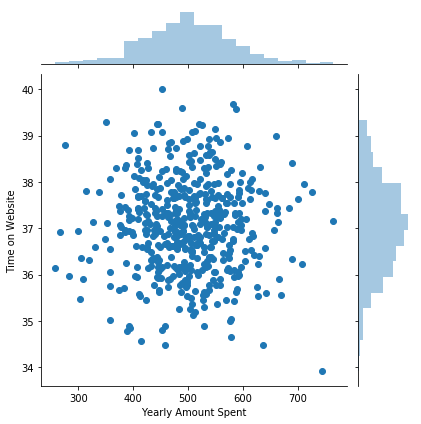

In [5]:
sns.jointplot(data=customer,x='Yearly Amount Spent', y='Time on Website')

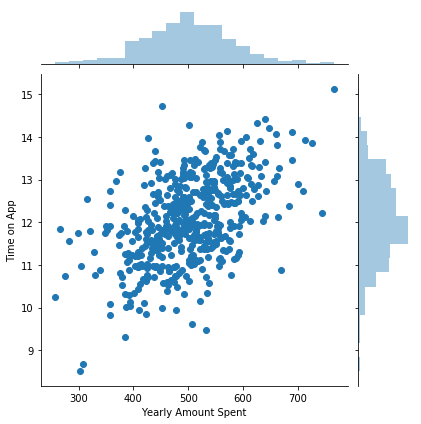

In [6]:
sns.jointplot(data=customer,x='Yearly Amount Spent', y='Time on App')

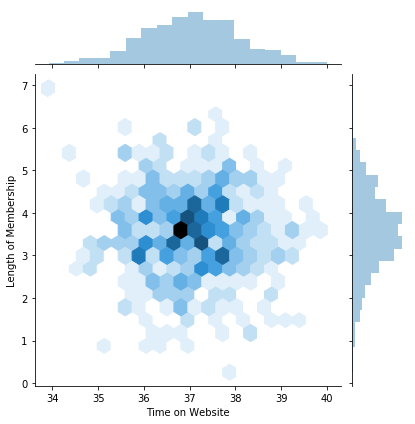

In [7]:
sns.jointplot(data=customer,x='Time on Website', y='Length of Membership', kind='hex')

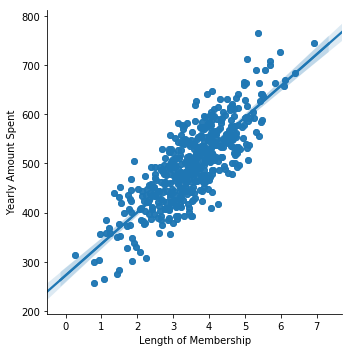

In [20]:
sns.lmplot(data=customer,x='Length of Membership', y='Yearly Amount Spent')
sns.regplot(data=customer,x='Length of Membership', y='Yearly Amount Spent')

In [9]:
#testing and training
customer.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [10]:
y=customer['Yearly Amount Spent']

In [11]:
X=customer[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101 )

In [13]:
#training model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train, y_train)
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

Text(0, 0.5, 'Predicted Values')

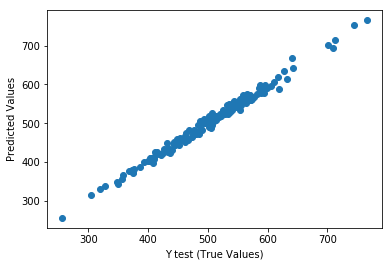

In [14]:
#predict data
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y test (True Values)')
plt.ylabel('Predicted Values')

In [15]:
#mean absolute error, mean squared error, root mean squared error
from sklearn import metrics
import numpy as np
print('MAE', metrics.mean_absolute_error(y_test,predictions))
print('MSE', metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 7.228148653430853
MSE 79.81305165097487
RMSE 8.933815066978656


In [16]:
metrics.explained_variance_score(y_test,predictions)

0.9890771231889606

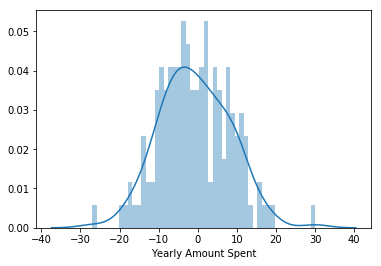

In [17]:
sns.distplot((y_test-predictions), bins=50)

In [18]:
cdfa=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [19]:
cdfa

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
